In [1435]:
!pip install torch

In [1436]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [1437]:
torch.__version__

'1.13.1+cpu'

In [1438]:
torch.cuda.is_available()

False

# implementing linear regression using NN


In [1439]:
from torch import nn #computtaional grfaphs


In [1440]:
class LinearRegressionModel(nn.Module):#almost every nn uses it
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad = True , dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad = True , dtype = torch.float))

    def forward(self, x : torch.Tensor) -> torch.Tensor :
        return self.weights * x + self.bias
        
    

In [1441]:
#torch.optim 
torch.manual_seed(42)
model_0 =  LinearRegressionModel()
print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [1442]:
# torch.manual_seed(42)
wt = 6
bs = -5
x = torch.arange(1,50,1)
print(x)
err = torch.randn(len(x))
print(err)
y = wt*x+bs + err




tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
tensor([ 0.6784, -1.2345, -0.0431, -1.6047,  1.7878, -0.4780, -0.2429, -0.9342,
        -0.7279, -0.5594, -0.7688,  0.7624, -1.5673, -0.2394,  2.3228, -0.9634,
        -0.7581,  1.0783,  0.8008,  1.6806,  0.3559, -0.6866, -0.4934,  0.2415,
        -0.2316,  0.0418, -0.2516,  0.8599, -0.3097, -0.3957,  0.8034, -0.6216,
         0.3189,  1.1914, -0.8140, -0.7360, -0.8371, -0.9224,  1.8113,  0.1606,
         0.3672,  1.8446, -1.1845,  1.3835, -1.2024,  0.7078, -1.0759,  0.5357,
         1.1754])


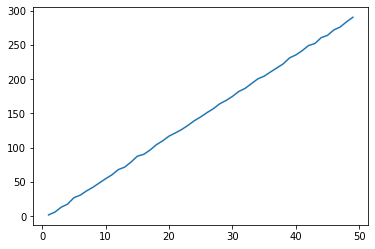

In [1443]:
x_n = x.numpy().copy().ravel()
y_n = y.numpy().copy().ravel()
x_n,y_n

plt.plot(x_n,y_n)
plt.show()

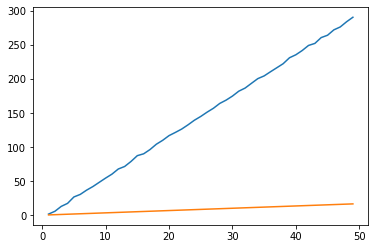

In [1444]:
with torch.inference_mode():
    y_pred = model_0(x)
# # or use
# with torch.no_grad():
#     y_pred = model_0(x)

y_predn = y_pred.numpy().copy().ravel()
plt.plot(x_n,y_n)
plt.plot(x_n,y_predn)
plt.show()

# # setting loss function & optimzer

In [1445]:
loss_fn= torch.nn.MSELoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.001)
print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


# Training model

In [1446]:
# torch.manual_seed(42)
epochs = 10
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(x)
    loss = loss_fn(y,y_pred )
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

    model_0.eval()
print(model_0.state_dict())  

OrderedDict([('weights', tensor([5.7677])), ('bias', tensor([0.2666]))])


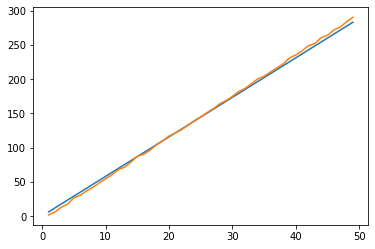

In [1447]:
y_pred = model_0(x)
plt.plot(x.detach().numpy(),y_pred.detach().numpy())
plt.plot(x.detach().numpy(),y.detach().numpy())
plt.show()

# <-- LOGISTIC REGRESSION -->

In [1448]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch 
from torch import nn

In [1449]:
n_samples = 5000
X,Y = make_circles(n_samples, noise = 0.06,random_state= 42)

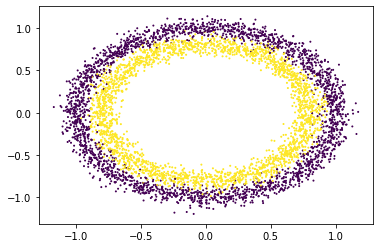

In [1450]:
plt.scatter(X[:,0],X[:,1],c= Y,s=1)

In [1451]:
x = torch.from_numpy(X)
y = torch.from_numpy(Y)


In [1452]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.25)




In [1453]:
y_test = y_test.double()
print(y_test.dtype)
#y_testy_ty_testst.dtype

torch.float64


In [1454]:
torch.cuda.is_available()

False

# Setting up model for classification 

In [1455]:
# torch.manual_seed(42)
class LogisticR(nn. Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2,5,dtype = torch.float64)
        self.l2 = nn.Linear(5,1,dtype = torch.float64)
        self.relu = nn.ReLU()
    def forward(self,x):
#         print(x.shape)
      return self.l2(self.relu(self.l1(x)))
    
        
        

In [1456]:
model_1 = LogisticR()

In [1457]:
model_1.state_dict()

OrderedDict([('l1.weight',
              tensor([[ 0.1616, -0.2362],
                      [ 0.2813,  0.5240],
                      [ 0.1699, -0.2493],
                      [-0.3208, -0.1652],
                      [-0.6353,  0.5546]], dtype=torch.float64)),
             ('l1.bias',
              tensor([-0.3967,  0.6791,  0.3100,  0.5155,  0.2125], dtype=torch.float64)),
             ('l2.weight',
              tensor([[-0.3313,  0.4465, -0.3609, -0.2078,  0.2660]], dtype=torch.float64)),
             ('l2.bias', tensor([-0.0420], dtype=torch.float64))])

In [1458]:
with torch.inference_mode():
    y_pred =model_1(x_test)
print(min(y_pred))


tensor([-0.3968], dtype=torch.float64)


In [1459]:
print (y_test.shape)
print (y_pred.shape)
print(y_test.dtype)


torch.Size([1250])
torch.Size([1250, 1])
torch.float64


# Loss function cross entropy


In [1460]:
loss_fun = nn.BCELoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 3)

In [1461]:
def accuracy(y_test, y_pred):
    correct = torch.eq(y_test,y_pred).sum().item()
    acc = correct/len(y_test)*100
    return acc

In [1462]:
epochs = 10000
for epoch in range(epochs):
    model_1.train()
#     y_pred = model_1(x_test).squeeze()
#     print(y_pred)
    y_pred = torch.sigmoid(model_1(x_test).squeeze())
#     print(y_pred)
    loss = loss_fun(y_pred, y_test )
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

    model_1.eval()
print(model_1.state_dict())  

OrderedDict([('l1.weight', tensor([[  0.1616,  -0.2362],
        [ 10.6476,   8.9670],
        [  9.4354, -11.6176],
        [-11.2828,  -8.6746],
        [ -8.6263,  10.5970]], dtype=torch.float64)), ('l1.bias', tensor([-0.3967, -7.1477, -8.0203, -7.4669, -7.0327], dtype=torch.float64)), ('l2.weight', tensor([[-0.3313, -2.7192, -2.7533, -2.7574, -2.7066]], dtype=torch.float64)), ('l2.bias', tensor([15.3392], dtype=torch.float64))])


In [1463]:
Y1=y_pred.detach().numpy()
# Y1 = np.where(Y1 >= 0.5, 1, 0)
X1 =x_test.detach().numpy()



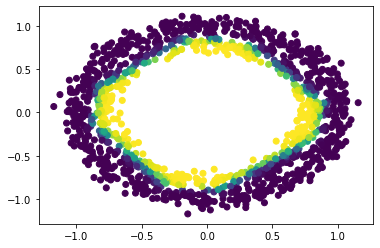

In [1464]:
plt.scatter(X1[:,0],X1[:,1],c= Y1)